Image dimensions: (211, 240, 256)
Image spacing: (1.0, 1.0, 1.0)


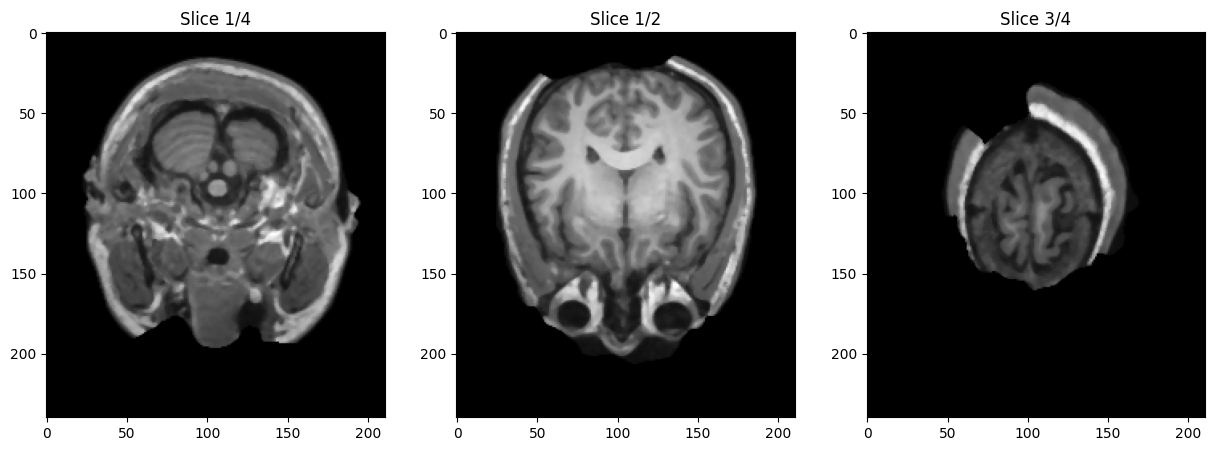

Brain volume: 3129094.00 cubic mm


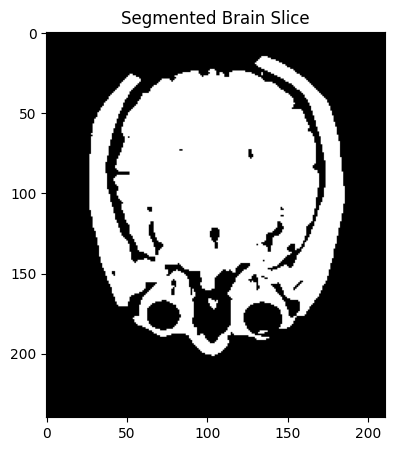

In [11]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Print image dimensions
print(f"Image dimensions: {image.GetSize()}")
print(f"Image spacing: {image.GetSpacing()}")

# Display multiple image slices (for 3D images)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_array[image_array.shape[0] // 4], cmap='gray')
axes[0].set_title('Slice 1/4')
axes[1].imshow(image_array[image_array.shape[0] // 2], cmap='gray')
axes[1].set_title('Slice 1/2')
axes[2].imshow(image_array[3 * image_array.shape[0] // 4], cmap='gray')
axes[2].set_title('Slice 3/4')
plt.show()

# Preprocess the image (e.g., skull stripping)
# This requires additional tools or predefined masks; assuming we have a binary brain mask
# brain_mask = sitk.ReadImage('brain_mask.nii')
# brain_image = sitk.Mask(image, brain_mask)

# Segment the brain (using Otsu thresholding for simplicity)
# In practice, more advanced methods like FSL FAST or SPM are used
brain_segmented = sitk.OtsuThreshold(image, 0, 1, 200)

# Convert the segmented image to a NumPy array
brain_segmented_array = sitk.GetArrayFromImage(brain_segmented)

# Calculate volumes (number of voxels in each segmented tissue)
brain_volume = np.sum(brain_segmented_array == 1) * np.prod(image.GetSpacing())
print(f"Brain volume: {brain_volume:.2f} cubic mm")

# Visualize the segmentation
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(brain_segmented_array[brain_segmented_array.shape[0] // 2], cmap='gray')
ax.set_title('Segmented Brain Slice')
plt.show()


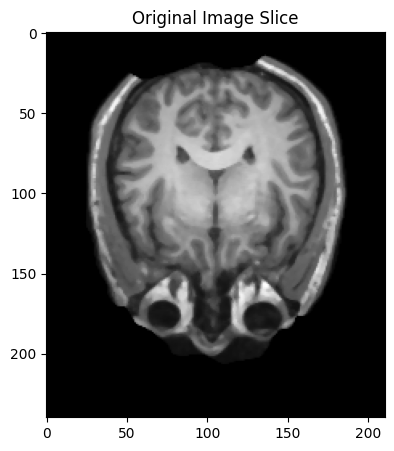

In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Display a slice of the original image
plt.figure(figsize=(5, 5))
plt.imshow(image_array[image_array.shape[0] // 2], cmap='gray')
plt.title('Original Image Slice')
plt.show()


Gray Matter Threshold unique values: [False  True]
White Matter Threshold unique values: [False  True]


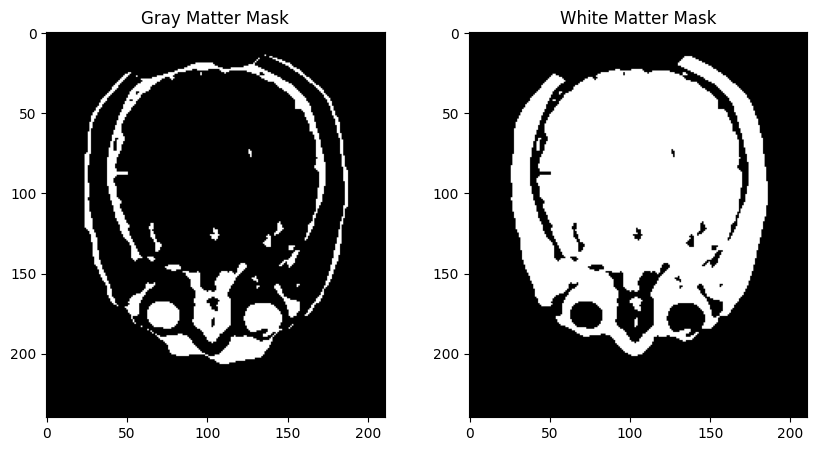

In [20]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Assuming image_array is already defined from previous steps
# Apply thresholding to segment gray matter and white matter
gray_matter_threshold = (image_array > 0) & (image_array < 100)
white_matter_threshold = image_array > 100

# Check unique values in the threshold arrays
print("Gray Matter Threshold unique values:", np.unique(gray_matter_threshold))
print("White Matter Threshold unique values:", np.unique(white_matter_threshold))

# Visualize the slices of the thresholded masks
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_matter_threshold[gray_matter_threshold.shape[0] // 2], cmap='gray')
axes[0].set_title('Gray Matter Mask')
axes[1].imshow(white_matter_threshold[white_matter_threshold.shape[0] // 2], cmap='gray')
axes[1].set_title('White Matter Mask')
plt.show()


Gray Matter Surface unique values: [0 1]
White Matter Surface unique values: [0 1]


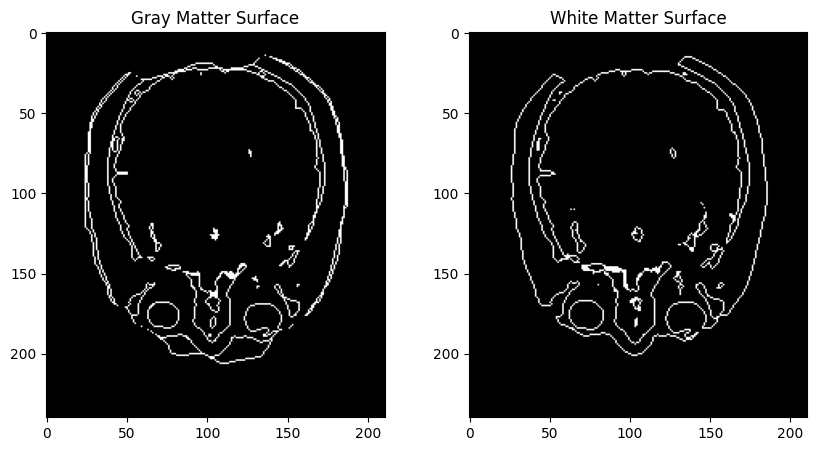

In [22]:
# Extract the surfaces of the gray matter and white matter
gray_matter_surface = sitk.LabelContour(sitk.GetImageFromArray(gray_matter_threshold.astype(np.uint8)))
white_matter_surface = sitk.LabelContour(sitk.GetImageFromArray(white_matter_threshold.astype(np.uint8)))

# Convert to NumPy arrays
gray_matter_surface_array = sitk.GetArrayFromImage(gray_matter_surface)
white_matter_surface_array = sitk.GetArrayFromImage(white_matter_surface)

# Check unique values in the surface arrays
print("Gray Matter Surface unique values:", np.unique(gray_matter_surface_array))
print("White Matter Surface unique values:", np.unique(white_matter_surface_array))

# Visualize the surfaces
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_matter_surface_array[gray_matter_surface_array.shape[0] // 2], cmap='gray')
axes[0].set_title('Gray Matter Surface')
axes[1].imshow(white_matter_surface_array[white_matter_surface_array.shape[0] // 2], cmap='gray')
axes[1].set_title('White Matter Surface')
plt.show()


Distance Transform range: 0.0 1.0
Cortical thickness measurements found.
Cortical Thickness range: 0.0 0.0


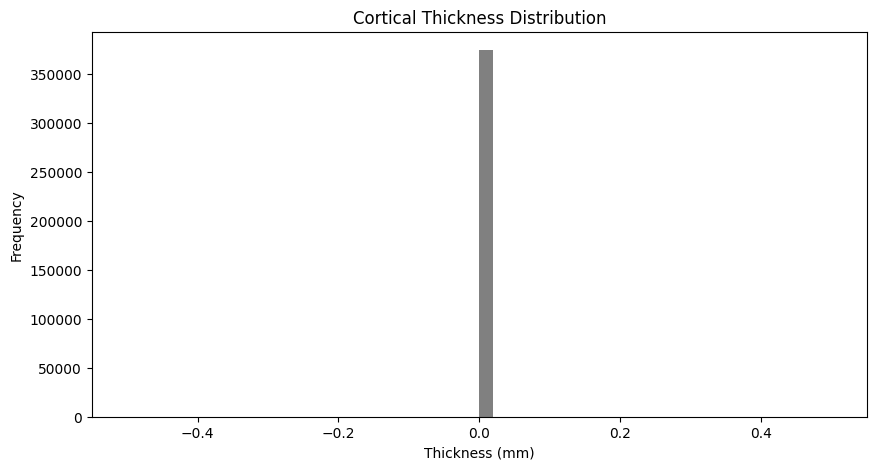

Average Cortical Thickness: 0.00 mm


In [23]:
from scipy.ndimage import distance_transform_edt

# Calculate the distance transform for the white matter surface
distance_transform = distance_transform_edt(white_matter_surface_array)

# Check the distance transform values
print("Distance Transform range:", np.min(distance_transform), np.max(distance_transform))


# Measure cortical thickness by sampling the distance transform at the gray matter surface
cortical_thickness = distance_transform[gray_matter_surface_array > 0]

# Ensure cortical thickness measurements are valid
if cortical_thickness.size == 0:
    print("No cortical thickness measurements found. Check your segmentation and thresholding steps.")
else:
    print("Cortical thickness measurements found.")
    print("Cortical Thickness range:", np.min(cortical_thickness), np.max(cortical_thickness))

# Display histogram of cortical thickness
plt.figure(figsize=(10, 5))
plt.hist(cortical_thickness, bins=50, color='gray')
plt.title('Cortical Thickness Distribution')
plt.xlabel('Thickness (mm)')
plt.ylabel('Frequency')
plt.show()

# Calculate average cortical thickness
average_thickness = np.mean(cortical_thickness)
print(f"Average Cortical Thickness: {average_thickness:.2f} mm")


